John Kaspers - Assignment 3

## Visualization Techniques

In this assignment I use the plotly library. 

The Plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. I chose Plotly because plotting scatter plots with Plotly is very easy.

Other libraries with similar capabilities include: Highcharts, Altair, Seaborn, Bokeh, Marvel, Matplotlib, and Storyline

Plotly pros & cons:

Pros: 
- Much more interactive & visually flexible than Matplotlib or Seaborn. 
- Make beautiful, interactive, exportable figures in just a few lines of code

Cons: 
- Confusing initial setup to use Plotly without an online account. 
- Out-of-date documentation and the large range of Plotly tools (Chart Studio, Express, etc.) make it hard to keep up.

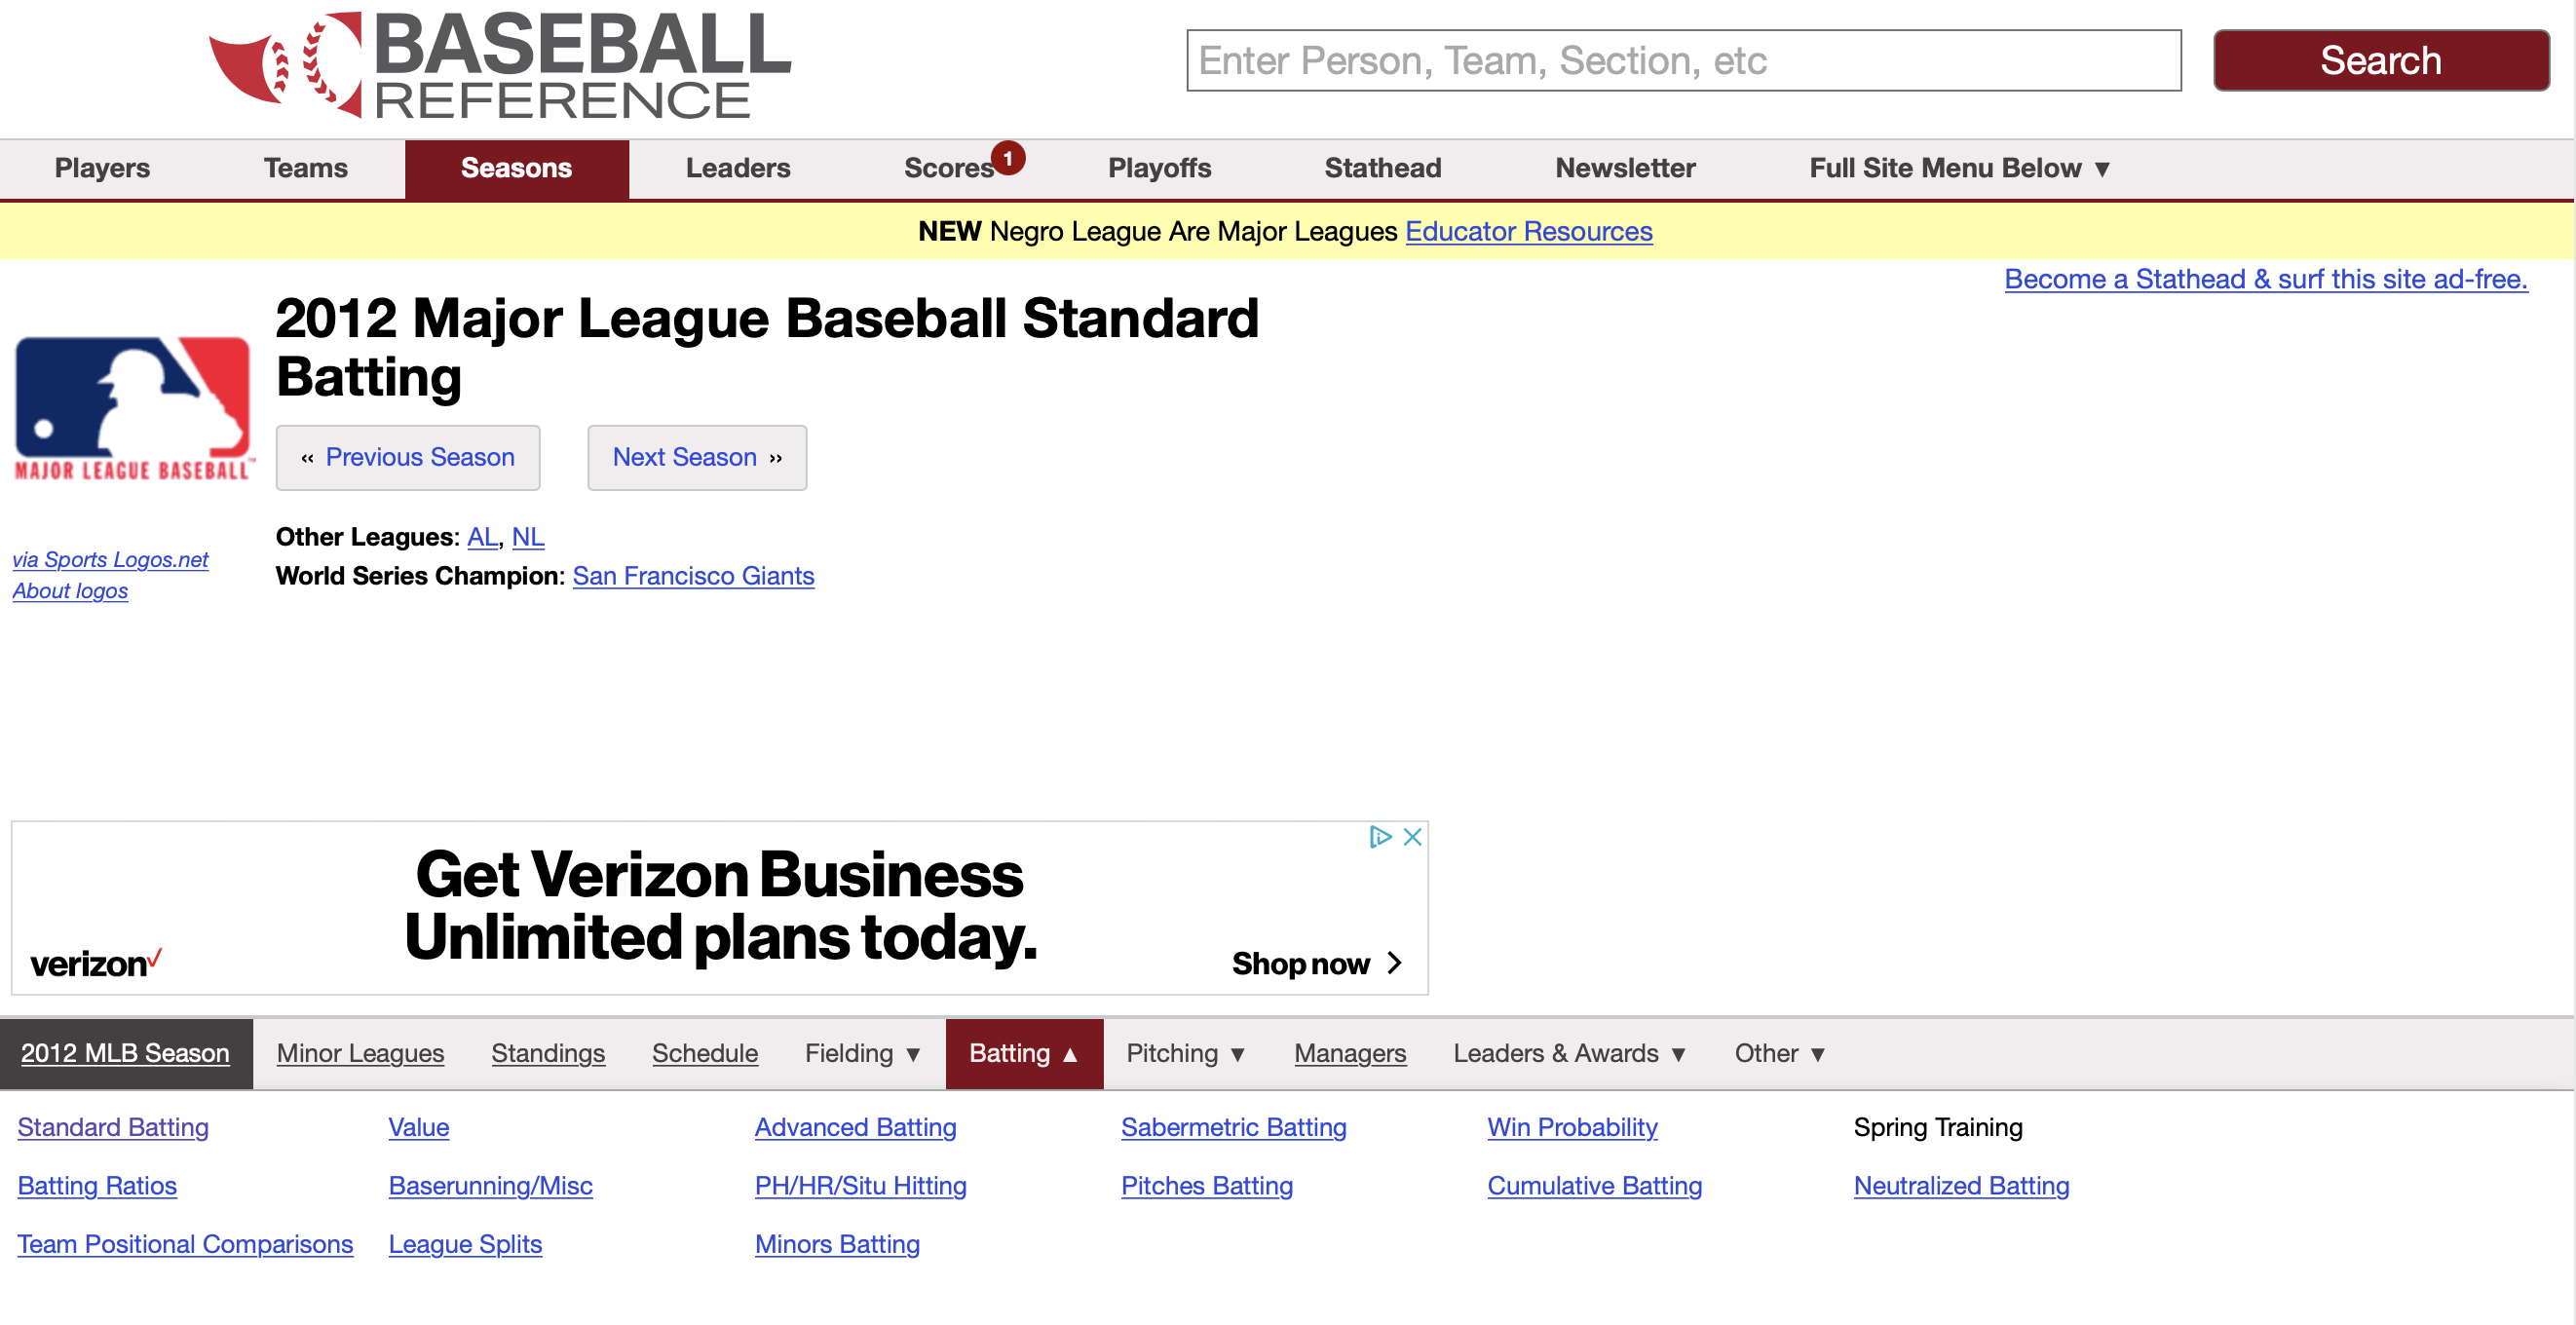

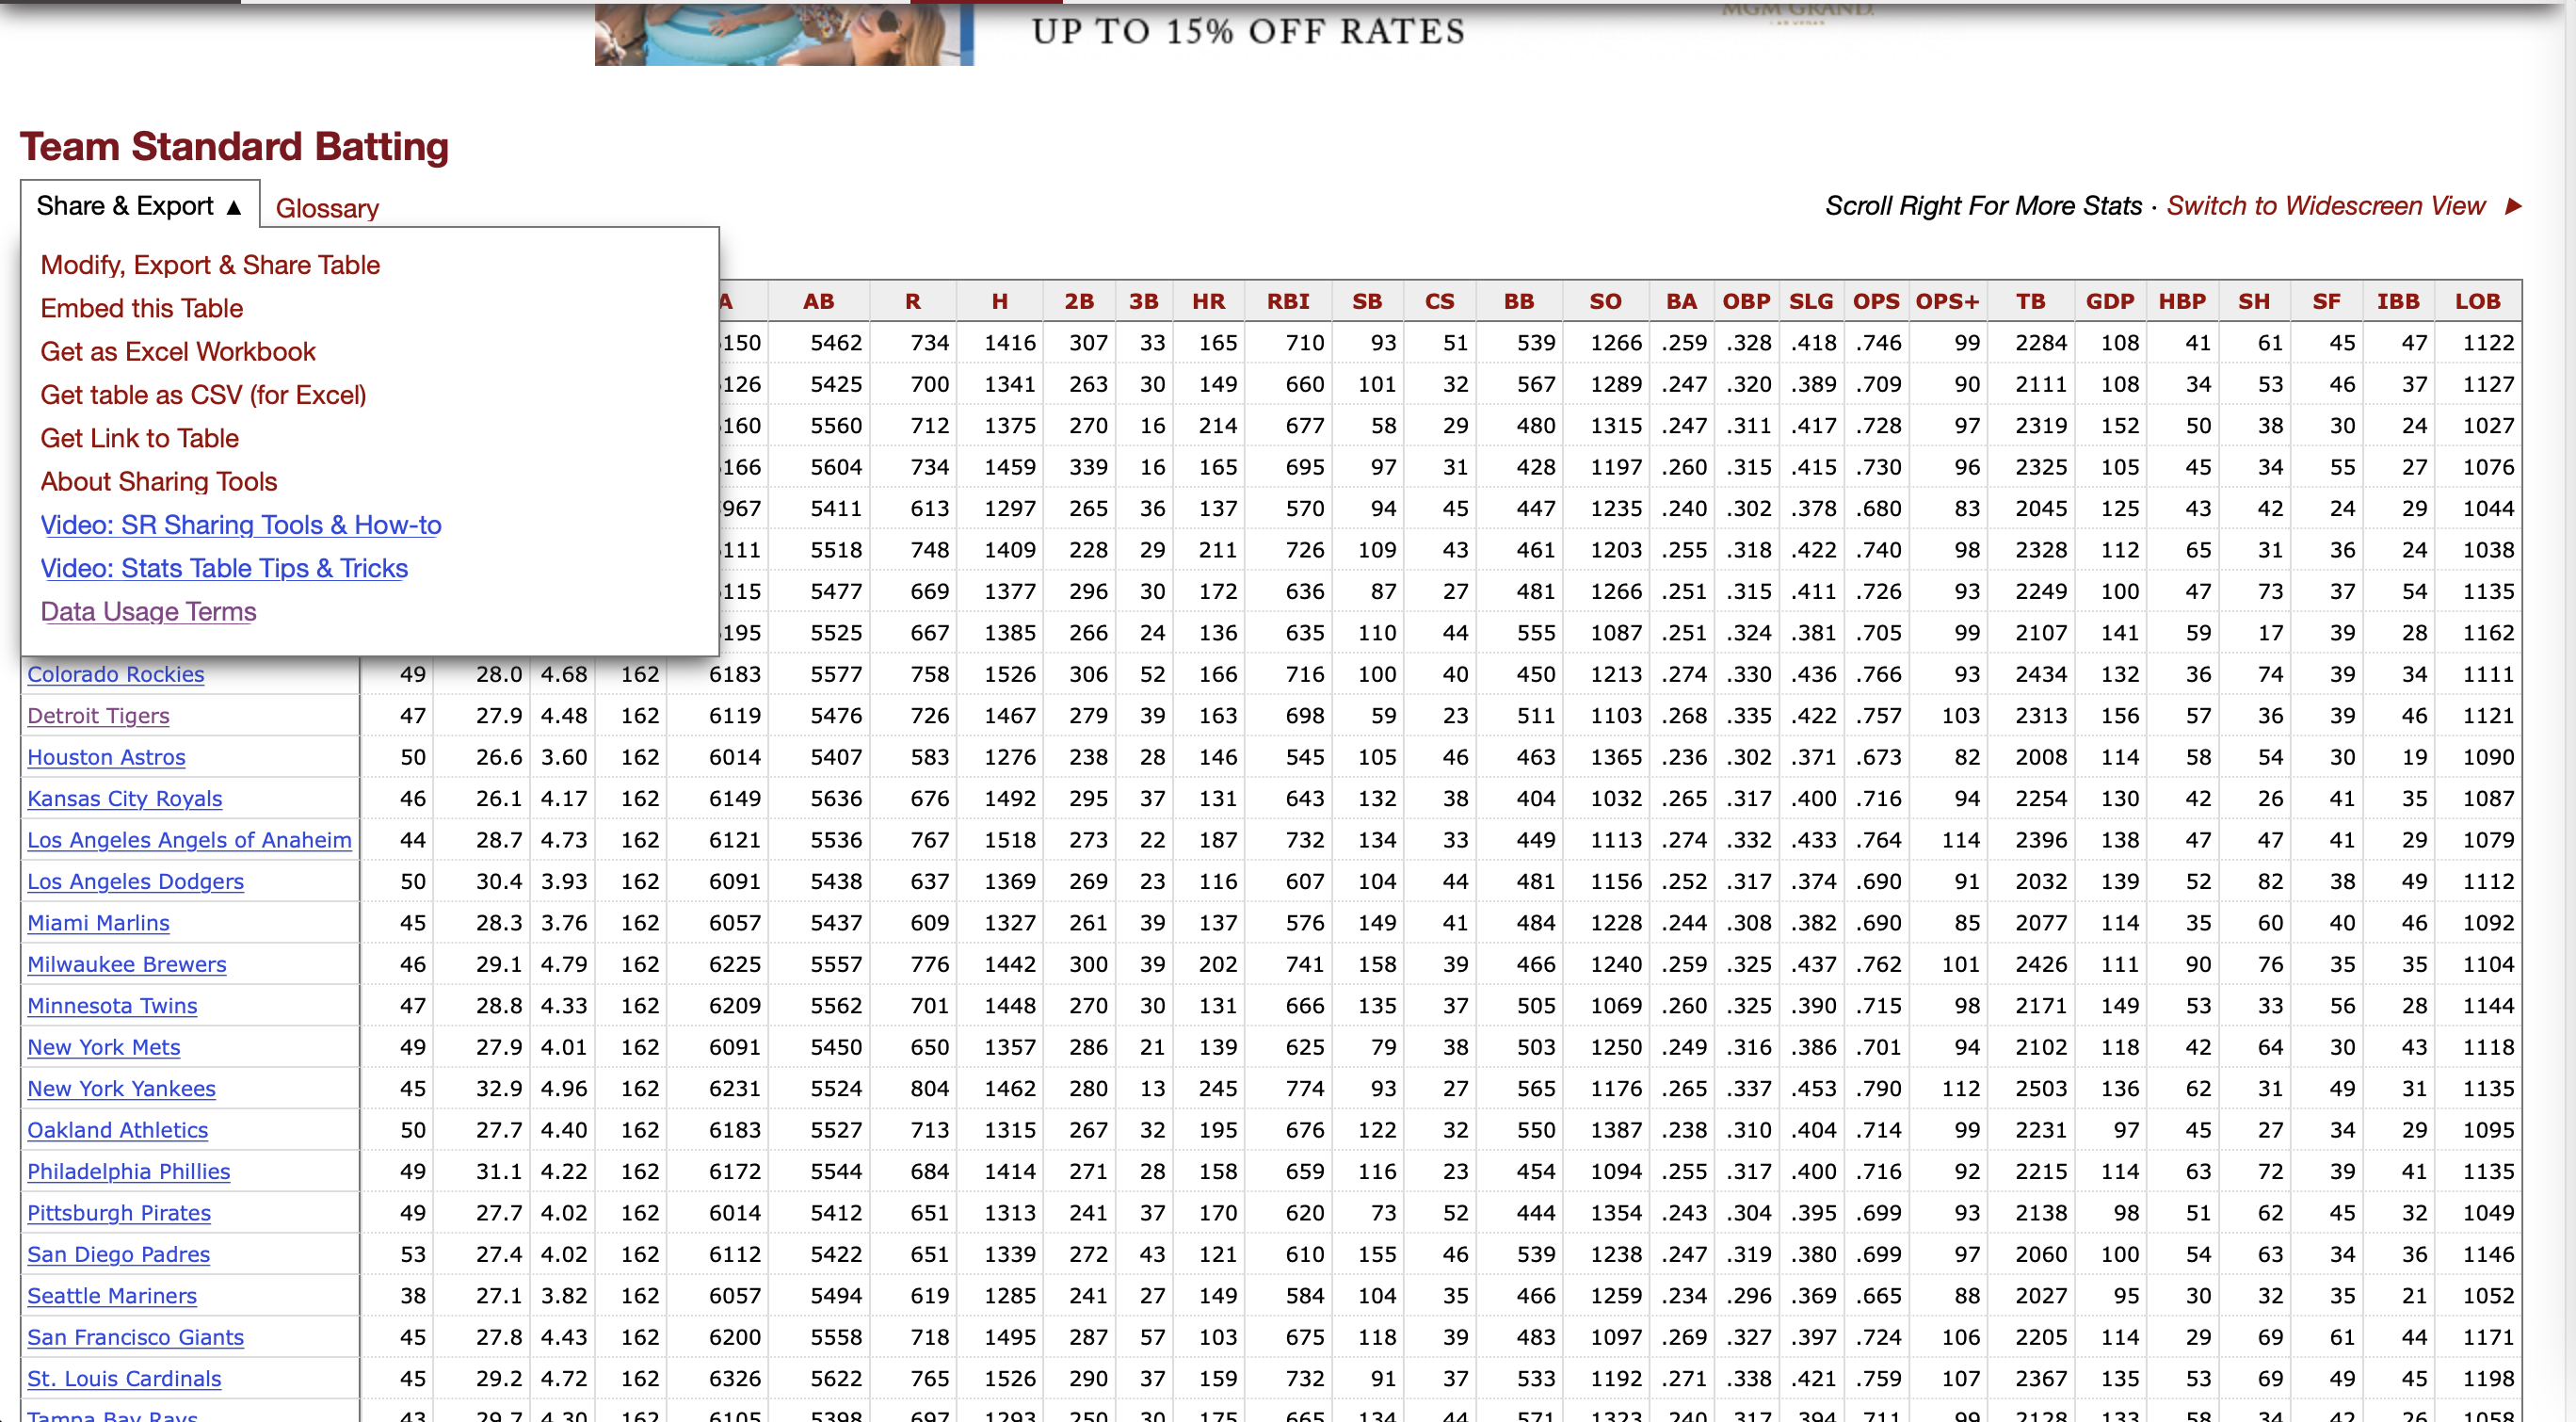

The data I use can be found at:

https://www.baseball-reference.com/leagues/majors/2012-standard-batting.shtml#header

After navigating to 'Batting' for the desired year, in this case 2012, you can easily download the desired data by going to 'Export & Share'. 

The data use policy can be found at:

https://www.sports-reference.com/data_use.html



## Visualization Library

Plotly was founded by Alex Johnson, Jack Parmer, Chris Parmer, and Matthew Sundquist. The library was founded in Montreal, Quebec in 2012, and released in 2013. The Plotly JSON visualization schema is a complete **declarative** format for creating, saving, and sharing interactive, scientific charts.

At its core, Plotly is actually a JavaScript library.


Plotly is a free and open-source software, licensed under the MIT license.

INSTALLATION - note: plotly does not come built-in with Python

To install:

plotly may be installed using pip:

$ pip install plotly==5.6.0

or conda:

$ conda install -c plotly plotly=5.6.0


Plotly's website: https://plot.ly/python/

Note: Plotly Offline is used when you want to host locally on your own computer. This is the approach I take, as it is easier.

- Command to create plot in Jupyter Notebook: plotly.offline.iplot()
- Command to create standalone HTML: plotly.offline.plot()

Installing Plotly Online (which you use if you want to host graphs in plotly account):

- Requires you make an account to run
- Set up an account at plot.ly
- Acquire a User ID and API keys
- Sign keys into the account

WHY PLOTLY?


- Plotly has hover tool capabilities
- It is visually attractive and can be accepted by a wide range of audiences
- It allows for endless customization of your graphs, making plots more meaningful and understandable for others

There are three main modules in Plotly:

- plotly.plotly
- plotly.graph.objects
- plotly.tools



plotly.plotly is the interface between the local machine and Plotly. It contains functions that require a response from Plotly's server.

plotly.graph_objects is a module that contains the objects responsible for creating the plots. These are things like, Figure, layout, data, and the definition of the plots like scatter plot, line chart

plotly.tools is a module that contains various tools in the forms of functions that can enhance the user experience with Plotly

## Demonstration

Winning a Triple Crown is one of the most difficult feats in baseball. To do so, a player must lead either the American League or National League in batting average (BA), home runs (HR) and runs-batted-in (RBIs). MLB has had 10 players win a total of 12 Triple Crowns since RBIs became an official statistic in 1920. In 2012, Miguel Cabrera (also known as 'Miggy') won the Triple Crown. My below analysis will show by how much Miguel Cabrera won (and just how dominant he was).

In [1]:
import pandas as pd
import plotly as plt
import plotly.offline as offline
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px
import statsmodels.api as sm   #Note, I imported sm for an OLS line in my demo

In [2]:
mlb_2012_df = pd.read_excel("sportsref_download.xls")

In [3]:
mlb_2012_df.head(10)

Rk            Name  Age   Tm   Lg    G   PA   AB   R    H  ...    SLG  \
0   1  Fernando Abad*   26  HOU   NL   36    7    7   0    1  ...  0.143   
1   2    Bobby Abreu*   38  TOT  MLB  100  257  219  29   53  ...  0.342   
2   3    Bobby Abreu*   38  LAA   AL    8   27   24   1    5  ...  0.333   
3   4    Bobby Abreu*   38  LAD   NL   92  230  195  28   48  ...  0.344   
4   5     Tony Abreu#   27  KCR   AL   22   74   70   5   18  ...  0.357   
5   6  Jeremy Accardo   30  TOT   AL    4    0    0   0    0  ...    NaN   
6   7  Jeremy Accardo   30  CLE   AL    4    0    0   0    0  ...    NaN   
7   8  Alfredo Aceves   29  BOS   AL    6    0    0   0    0  ...    NaN   
8   9  Dustin Ackley*   24  SEA   AL  153  668  607  84  137  ...  0.328   
9  10    Manny Acosta   31  NYM   NL   44    0    0   0    0  ...    NaN   

     OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  Pos Summary  
0  0.286 -22.0    1    1    0   0   0    0            1  
1  0.693  94.0   75    7    0   0   1    3        7H/D9  
2  0.593  66.0    8    1    0   0   1    0         /7H9  
3  0.704  97.0   67    6    0   0   0    3        7H/D9  
4  0.641  74.0   25    1    1   0   1    0       4/56HD  
5    NaN   NaN    0    0    0   0   0    0            1  
6    NaN   NaN    0    0    0   0   0    0            1  
7    NaN   NaN    0    0    0   0   0    0            1  
8  0.622  77.0  199    3    0   1   1    7       *43/DH  
9    NaN   NaN    0    0    0   0   0    0            1  

[10 rows x 30 columns]

Players with "TOT" as their team ('Tm') indicate that that player played for Two Other Teams. In other words, that player played for two (or more) teams that season.

#### data cleaning: 

Because I am simply comparing three categories within this DataFrame, there is not much data cleaning that needs to be done. Namely, I aim to compare the hitting statistics (HR, BA, and RBI) for players across the American and National Leagues.

In [4]:
#Cleaning up the df
#players that played for more than one team in 2012 have 'MLB' as their League (Lg)
#For this analysis, we should omit these individuals' data
#This creates a subset of my dataframe containing every player in either the American or National League
mlb_2012_df = mlb_2012_df[mlb_2012_df['Lg'] != 'MLB']

#Rather than displaying all of the data, let's just look at the top performers
rbi = mlb_2012_df[mlb_2012_df['RBI'] > 100]
homeruns = mlb_2012_df[mlb_2012_df['HR'] > 30]

#To qualify for the batting title, players must have at least 502 plate appearances (PA)
BA = mlb_2012_df[mlb_2012_df['PA'] >= 502]

In [5]:
mlb_2012_df.columns

Index(['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary'],
      dtype='object')

In [6]:
len(mlb_2012_df)

474

Picking out Miguel Cabrera's hitting statistics

In [7]:
homeruns['HR'].max() #This returns a value of 44, which is Miguel Cabrera's HR count

44

In [8]:
rbi['RBI'].max()#This returns a value of 139, which is Miguel Cabrera's RBI count

139

In [9]:
BA['BA'].max() #This returns a value of 0.330, which is Miguel Cabrera's batting average

0.33

#### Some exploratory plotting:

In [10]:
#For the sake of having a cleaner looking graph, I drop all hitters without RBIs

mlb_2012_df = mlb_2012_df[mlb_2012_df['RBI'] != 0]
mlb_2012_df = mlb_2012_df.sort_values(by="RBI")

plt.plot(mlb_2012_df, kind = 'scatter', x = mlb_2012_df['Name'], y = mlb_2012_df['RBI'])


Plotly can also find a line of best fit for us (with the help of statsmodels.api):

In [11]:
fig = px.scatter(BA, x = BA['HR'], y=BA['BA'], trendline="ols",
          marginal_x = "histogram", marginal_y = "histogram")

fig.show()

In the above plot, batting average and homeruns do not have a very strong correlation. I chose to include this example to display the functionality of plotly. Miguel Cabrera is clearly an outstanding hitter as shown by the point in the upper right corner of the above scatterplot. Adam Dunn is the hitter with the lowest average in the above plot (with 41 homeruns and a batting average of 0.204).

The above plot shows just how easy charting with plotly is. I was able to create a relatively intricate chart with two/three lines of code.

### Using plotly.graph_objects:

The below code and chart is a simplified version of the chart that follows it.

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(x=rbi['Name'], y=rbi['RBI'], name = "RBI"),
    row=1, col=1,
    
)

fig.add_trace(
    go.Scatter(x=rbi['Name'], y=rbi['HR'], name = "HR"),
    row=1, col=1,
    
)

fig.add_hline(y = 139, annotation_text = "Miggy RBIs = 139")
fig.add_hline(y = 44, annotation_text = "Miggy HRs = 44")

fig.update_layout(height=600, width=550, 
                  title_text="How good was Miguel Cabrera?",
                 )
fig.show()

I've added horizontal lines to this chart to clarify Miggy's RBI and HR values.

Clearly, Curtis Granderson was right on Miguel Cabrera's tail in homeruns. However, with runners in scoring position, Miguel Cabrera led the league by 27 runs-batted-in (RBIs).

Below is the same data, graphed differently. Plotly allows for a variety of graphing techniques.

In [13]:
rbi = rbi.sort_values(by="RBI")


fig = px.scatter(rbi, y=rbi['Name'], x=rbi['HR'], color="HR",
                 size = "HR",
                 title="Miggy and the add_scatter() method With A Plotly Express Figure",
                 labels = "HR"
                )

fig.add_scatter(
    y=rbi['Name'],
    x=rbi['RBI'],
    hoverinfo="skip",
    mode="markers",
    marker=dict(size=10),
    name="RBIs",
)

fig.update_layout(legend=dict(
    yanchor="bottom",
    xanchor="right",
))
fig.show()

## Bonus:

Plotly express, commonly imported as px, includes more than 30 functions for creating different types of figures. Below is a 3-D scatterplot of hitters in 2012. This image shows homeruns, runs-batted-in, and batting average, all graphed by League association (AL = American League, NL = National League). Additionally, the nice thing about this 3-D scatterplot is that it is interactive. This means if you click on AL in the legend, then the AL data disappears. Likewise, if you click NL in the legend, that data disappears. This interactivity is on top of the already draggable interactivity of the 3-D scatterplot.

In [14]:
px.scatter_3d(mlb_2012_df, mlb_2012_df['HR'], 
              mlb_2012_df['RBI'], mlb_2012_df['BA'],
             color = "Lg")

If we wanted to further explore the plotly library, we might be interested in using violin or boxplots. Below are some examples of both. 

The first plot is a violin plot for batting averages across the two Leagues. 

The second plot compares homeruns across the two leagues.

In [15]:
fig = px.violin(mlb_2012_df, x = "Lg", y = "BA", box = True, 
                points = "all",
               title = 'Batting average by League')
fig.show()

The above plot is a violin plot with boxplots inside of it. These violin plots compare batting averages across the two leagues, National and American. Clearly, there are better hitters in the American League, as shown by the lack of a wide tail for low batting averages. This contrasts with the slightly larger tail for batters in the National League. One possible explanation for this could be that pitchers bat in the National League, whereas they do not in the American League. Additionally, the hitters with batting averages above Miguel Cabrera's 0.330 in the American League do not qualify for the batting title because they do not have enough plate appearances.

In [16]:
fig = px.box(mlb_2012_df, y = "HR", x = "Lg", points = "all",
            title = "Homeruns by League")
fig.show()

To round-out this exploration of plotly, below is RBIs by league:

In [17]:
fig = px.box(mlb_2012_df, y = "RBI", x = "Lg", points = "all",
            title = "RBIs by League")
fig.show()

Other common graph types in plotly include:
- Heatmaps
- Contour plots
- Gantt Charts
- Error Bars
- 3D Line Plots (which are slightly different than the 3D scatterplot above)


References:

- https://datax.berkeley.edu/wp-content/uploads/2020/10/Plotly-Deck.pdf
- https://www.geeksforgeeks.org/python-plotly-tutorial/
